<a href="https://colab.research.google.com/github/SantiagoAzofeifa/AnalisisDatos/blob/main/Funciones_Graficos_Articulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Apertura de archivo
#https://data.torontopolice.on.ca/datasets/shooting-and-firearm-discharges-open-data/explore

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/Shooting_and_Firearm_Discharges_Open_Data.csv')
data=pd.DataFrame(df)
print(data)

              X          Y  OBJECTID EVENT_UNIQUE_ID                    DATE  \
0    -79.234955  43.781528         1   GO-2004397105  2004/05/15 04:00:00+00   
1    -79.618218  43.733547         2   GO-2004600109  2004/07/26 04:00:00+00   
2    -79.518759  43.769157         3   GO-2004311851  2004/05/14 04:00:00+00   
3    -79.378870  43.660665         4   GO-2004736004  2004/12/19 05:00:00+00   
4    -79.212435  43.812075         5   GO-2004303455  2004/04/12 04:00:00+00   
...         ...        ...       ...             ...                     ...   
5702 -79.362941  43.771764      5703  GO-20221038418  2022/06/02 04:00:00+00   
5703 -79.402702  43.643920      5704  GO-20221362949  2022/07/17 04:00:00+00   
5704 -79.196217  43.786621      5705   GO-2022336423  2022/02/21 05:00:00+00   
5705 -79.443993  43.658083      5706  GO-20221765442  2022/09/11 04:00:00+00   
5706 -79.369456  43.654519      5707   GO-2022783839  2022/04/27 04:00:00+00   

      YEAR      MONTH        DOW  DOY  

In [ ]:
# Funcion 1.
# A. Obtener las tres primeras fechas con mayores muertes registradas.
def obtener_top_muertes_por_fecha(data):
    datos_filtrados = data.loc[data['DEATH'] > 0]
    datos_ordenados = datos_filtrados.sort_values(by=['DEATH'], ascending=False)
    top_muertes = datos_ordenados[['YEAR', 'MONTH', 'DAY','DEATH']].head(3)
    return top_muertes

resultado = obtener_top_muertes_por_fecha(data)
print(resultado)
#Esta funcion toma en cuenta la cantidad de muertes que hubieron durante cada mes del
#anio para luego mostrar los dos meses con mas asesinatos cometidos, de ese mes tambien nos muestra
#el anio y la cantidad de asesinatos.

      YEAR      MONTH  DAY  DEATH
257   2005  September   16      3
945   2008       July   20      3
1494  2010  September   29      2


In [ ]:
# Funcion 2.
# B. Saber cuál fue el año con más muertes en el periodo de tiempo de estudio.
def anio_mas_muertes():
    muertes_por_anio = df.groupby('YEAR')['DEATH'].sum()
    anio_con_mas_muertes = muertes_por_anio.idxmax() #Evaluar
    return anio_con_mas_muertes

anio_con_mas_muertes = anio_mas_muertes()
print(f"Anio con mas muertes: {anio_con_mas_muertes}")
#Esta funcion nos imprime el anio con mas muertes totales de todo el periodo.

Anio con mas muertes: 2005


In [ ]:
# Funcion 3.
# C. Obtener los meses con más personas heridas en el año 2005.
def heridos_por_mes_2005():
    heridos_por_mes = df[df['YEAR'] == 2005].groupby('MONTH')['INJURIES'].sum()
    heridos_por_mes = heridos_por_mes.sort_values(ascending=False)
    return heridos_por_mes

heridos_por_mes_2005 = heridos_por_mes_2005()
print(heridos_por_mes_2005)

#Como sabemos tambien gracias a la funcion 1, el anio 2005 fue el anio donde se cometieron los 3 asesinatos
#en Septiembre, por lo tanto queremos saber cuantos heridos hubieron ese anio y que meses sucecieron.

MONTH
June         24
August       22
July         20
April        16
December     15
May          15
October      14
November     13
March        12
February     11
January       8
September     8
Name: INJURIES, dtype: int64


In [ ]:
# Funcion 4.
# D. Impresión de los meses en orden descendente en los cuales más altercados ocurrieron de todos los años dentro del periodo.
def contar_meses_desde_anio(data, anio_minimo=2004):
    data_filtrada = data.loc[data['YEAR'] >= anio_minimo]
    conteo_meses = data_filtrada['MONTH'].value_counts()#Evaluar
    return conteo_meses

resultado = contar_meses_desde_anio(data)
print(resultado)
#Es decir, en el ejemplo el mes con mas altercados fue agosto con 604, eso significa
#que en todos los meses de agosto de todos los anios registrados el total de altercados fue ese.

August       604
July         587
September    537
May          520
June         491
October      488
January      440
April        438
November     427
March        424
December     410
February     341
Name: MONTH, dtype: int64


In [ ]:
# Funcion 5.
# E. Filtrado por tiempo del dia
def sumar_muertes_y_heridas_2010(data, tiempo):
#¿Cuál será la cantidad de altercados ocurridos en una etapa del día específica en el año 2010?
    data_2010 = data[data['YEAR'] == 2010]

    if tiempo == 'Afternoon':
        data_filtrada = data_2010[(data_2010['TIME_RANGE']) == 'Afternoon' ]
    elif tiempo == 'Evening':
        data_filtrada = data_2010[(data_2010['TIME_RANGE'])== 'Evening']
    elif tiempo == 'Night':
        data_filtrada = data_2010[(data_2010['TIME_RANGE'] ) == 'Night']
    elif tiempo == 'Morning':
        data_filtrada = data_2010[(data_2010['TIME_RANGE'] ) == 'Morning']

    #Calcular la suma de 'DEATH' y 'INJURIES'
    suma_muertes = data_filtrada['DEATH'].sum()
    suma_heridas = data_filtrada['INJURIES'].sum()

    return suma_muertes, suma_heridas

time_range = input("Ingrese un periodo del dia para el filtrado: ")
muertes, heridas = sumar_muertes_y_heridas_2010(data, time_range)
print(f"Para el tiempo '{time_range}' en el año 2010,\nla suma de muertes es {muertes} y la suma de personas heridas es {heridas}.")
#Esta funcion toma el tiempo escrito por el usuario, hace las sumas correspondientes a las muertes y personas heridas
#del año 2010, para retornar los datos encontrados con esas sumas.

Ingrese un periodo del dia para el filtrado: Night
Para el tiempo 'Night' en el año 2010,
la suma de muertes es 10 y la suma de personas heridas es 53.


In [ ]:
# Funcion 6.
# F.	Se sabe el año con más muertes registradas. ¿Pero y el año con más personas heridas y cuantos fueron registrados?
def anio_mas_heridos():
    heridas_por_anio = df.groupby('YEAR')['INJURIES'].sum()
    anio_con_mas_heridos = heridas_por_anio.idxmax()
    total_heridos = heridas_por_anio.max()
    return anio_con_mas_heridos, total_heridos

anio_con_mas_heridos, total_heridos = anio_mas_heridos()
print(f"Anio con mas heridos: {anio_con_mas_heridos}")
print(f"Total de heridos en ese año: {total_heridos}")
#En esta funcion se cuenta el total de personas heridas durante el periodo y
#nos devuelve el anio con mas personas heridas.

Anio con mas heridos: 2019
Total de heridos en ese año: 240


In [ ]:
#Funcion 7.
#G.	Datos en el mes de septiembre.
def dataSetiembre():
  return data.loc[(data['MONTH']=='September')]

print(dataSetiembre())
#Gracias a la funcion 1, sabemos que Septiembre es el mes con mas asesinatos cometidos,
#por esta razon queremos saber que paso en el mes de Septiembre durante el periodo.

              X          Y  OBJECTID EVENT_UNIQUE_ID                    DATE  \
7    -79.588530  43.738688         8   GO-2004646393  2004/09/08 04:00:00+00   
20   -79.373917  43.653962        21   GO-2004649788  2004/09/11 04:00:00+00   
22   -85.488744   0.000000        23   GO-2004591518  2004/09/03 04:00:00+00   
38   -79.302434  43.797213        39   GO-2004497549  2004/09/30 04:00:00+00   
42   -79.328071  43.667525        43   GO-2004668846  2004/09/24 04:00:00+00   
...         ...        ...       ...             ...                     ...   
5664 -79.385553  43.648863      5665  GO-20221766117  2022/09/11 04:00:00+00   
5669 -79.489545  43.746807      5670  GO-20221757893  2022/09/10 04:00:00+00   
5696 -79.255781  43.736698      5697  GO-20221839939  2022/09/21 04:00:00+00   
5700 -79.537787  43.717190      5701  GO-20221758114  2022/09/10 04:00:00+00   
5705 -79.443993  43.658083      5706  GO-20221765442  2022/09/11 04:00:00+00   

      YEAR      MONTH        DOW  DOY  

In [ ]:
# Funcion 8.
# H. Mes con mas muertes en total en el anio 2005
def mes_mas_muertes_2005(data_2005):
    muertes_por_mes = data_2005.groupby('MONTH')['DEATH'].sum()
    mes_con_mas_muertes_2005 = muertes_por_mes.idxmax()
    return mes_con_mas_muertes_2005

data_2005 = df[df['YEAR'] == 2005]
mes_con_mas_muertes = mes_mas_muertes_2005(data_2005)
print(f"Mes con más muertes en el año 2005: {mes_con_mas_muertes}")

#Tambien nos interesa saber cual fue el mes del anio 2005 con mas muertes totales,
#esta funcion, hace una suma en cada mes, y nos entrega el que mas muertes tuvo.

Mes con más muertes en el año 2005: August


In [ ]:
# Funcion 9.
# I. Imprimir los datos de los acontecimientos ocurridos en el anio 2010.
def data2010():
  return data.loc[(data['YEAR']==2010)]
print(data2010())
#Gracias a la funcion 1, sabemos que otra de las fechas ocurrio en el anio 2010
#por lo tanto queremos ver los datos registrados en ese anio.

              X          Y  OBJECTID EVENT_UNIQUE_ID                    DATE  \
1365 -79.432442  43.639686      1366  GO-20103719744  2010/11/11 05:00:00+00   
1366 -79.240108  43.788863      1367  GO-20103842165  2010/05/12 04:00:00+00   
1367 -79.428126  43.635975      1368  GO-20103778563  2010/08/27 04:00:00+00   
1368 -79.554057  43.695335      1369  GO-20103801910  2010/12/31 05:00:00+00   
1369 -79.567160  43.683330      1370  GO-20102384820  2010/09/22 04:00:00+00   
...         ...        ...       ...             ...                     ...   
1619 -79.185722  43.753568      1620  GO-20103762306  2010/06/01 04:00:00+00   
1620 -79.495071  43.688950      1621  GO-20103812935  2010/09/04 04:00:00+00   
1621 -79.500001  43.761057      1622  GO-20103446670  2010/11/03 04:00:00+00   
1622 -79.405829  43.656852      1623  GO-20103885505  2010/11/01 04:00:00+00   
1623 -79.603912  43.743634      1624  GO-20103859861  2010/07/03 04:00:00+00   

      YEAR      MONTH        DOW  DOY  

In [ ]:
# Funcion 10.
# J. Imprimir los datos de los acontecimientos ocurridos en el mes de enero del anio 2010 especificamente.
def data2010_Enero():
  return data.loc[(data['YEAR']==2010) & (data['MONTH']=='January')]
print(data2010_Enero())
#En esta funcion se imprimen los datos del anio 2010 pero esta vez especificamente del mes de Enero
#para saber como comenzo ese anio.

              X          Y  OBJECTID EVENT_UNIQUE_ID                    DATE  \
1386 -79.508884  43.696808      1387  GO-20103651358  2010/01/29 05:00:00+00   
1397 -79.213764  43.744333      1398  GO-20103133204  2010/01/07 05:00:00+00   
1415 -79.366042  43.662164      1416  GO-20103648874  2010/01/29 05:00:00+00   
1442 -79.448227  43.719106      1443  GO-20103665325  2010/01/07 05:00:00+00   
1449 -79.499791  43.624881      1450  GO-20103669221  2010/01/30 05:00:00+00   
1522 -79.322706  43.697241      1523  GO-20103720862  2010/01/14 05:00:00+00   
1544 -79.217662  43.798116      1545  GO-20103688752  2010/01/14 05:00:00+00   
1548 -79.297019  43.691738      1549  GO-20103658361  2010/01/24 05:00:00+00   
1560 -79.195334  43.764692      1561  GO-20103597324  2010/01/15 05:00:00+00   
1561 -79.211206  43.811851      1562  GO-20103566324  2010/01/07 05:00:00+00   
1570 -79.213407  43.761120      1571  GO-20103604082  2010/01/02 05:00:00+00   
1573 -79.400915  43.651212      1574  GO

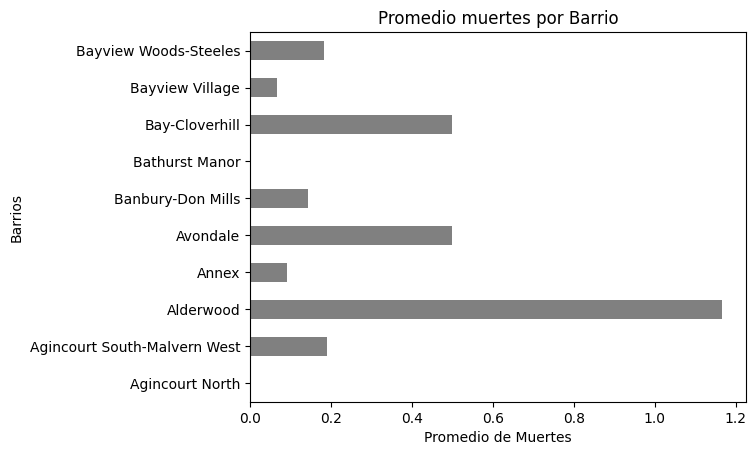

In [ ]:
# Grafico 1.
# Promedio Muertes por Barrio.
ciudad_mas_muertes=df.groupby("NEIGHBOURHOOD_158")["DEATH"].mean()
ciudad_mas_muertes.head(10).plot.barh(color="gray")
plt.xlabel('Promedio de Muertes')
plt.ylabel('Barrios')
plt.title('Promedio muertes por Barrio')
plt.show()

Text(0.5, 1.0, 'Histograma de Muertes por tiempo (Mannana/tarde/noche)')

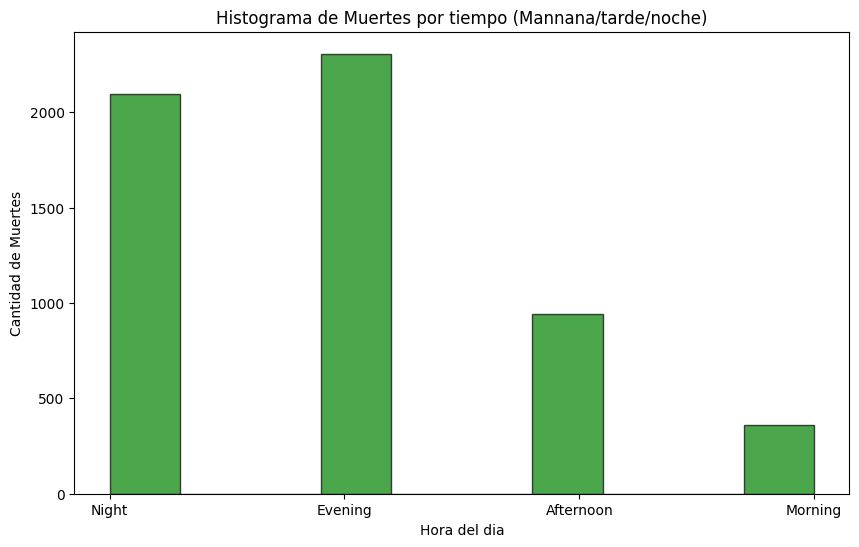

In [ ]:
# Grafico 2
# Obtener los datos de muertes por tiempo (Mannana/tarde/noche)
DEATH = df['DEATH']
TIME_RANGE = df['TIME_RANGE']
#Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(TIME_RANGE, bins=10, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de Muertes')
plt.title('Histograma de Muertes por tiempo (Mannana/tarde/noche)')


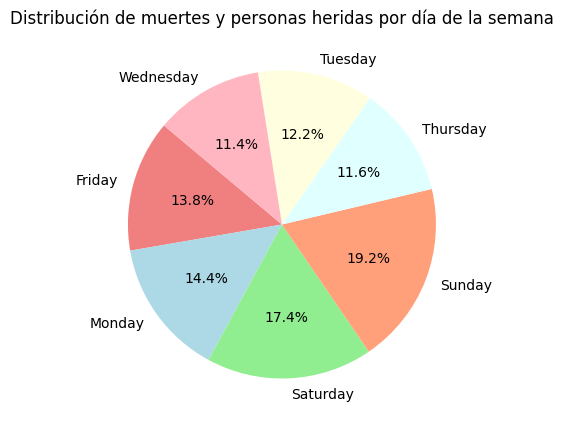

In [ ]:
# Grafico 3.
# Distribución de Muertes y personas heridas por día de la semana.
total_muertes_por_dia = df.groupby('DOW')['DEATH'].sum()
total_heridos_por_dia = df.groupby('DOW')['INJURIES'].sum()

#Crear el gráfico de pastel
plt.figure(figsize=(5, 5))
plt.pie(total_muertes_por_dia + total_heridos_por_dia, labels=total_muertes_por_dia.index, startangle=140, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightcyan', 'lightyellow', 'lightpink'])

#Título
plt.title('Distribución de muertes y personas heridas por día de la semana')

plt.show()

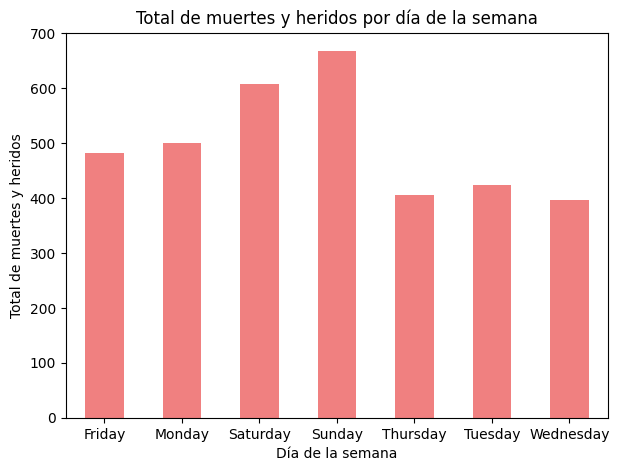

In [ ]:
# Grafico 4.
# Total de muertes y heridos por día de la semana.
total_muertes_por_dia = df.groupby('DOW')['DEATH'].sum()
total_heridos_por_dia = df.groupby('DOW')['INJURIES'].sum()

#Combinar las sumas de 'DEATH' e 'INJURIES'
total_combinado = total_muertes_por_dia + total_heridos_por_dia

#Crear el gráfico de barras
plt.figure(figsize=(7, 5))
total_combinado.plot(kind='bar', color='lightcoral')
plt.xlabel('Día de la semana')
plt.ylabel('Total de muertes y heridos')
plt.title('Total de muertes y heridos por día de la semana')
plt.xticks(rotation=0)  #Para evitar la rotación de las etiquetas en el eje x

plt.show()

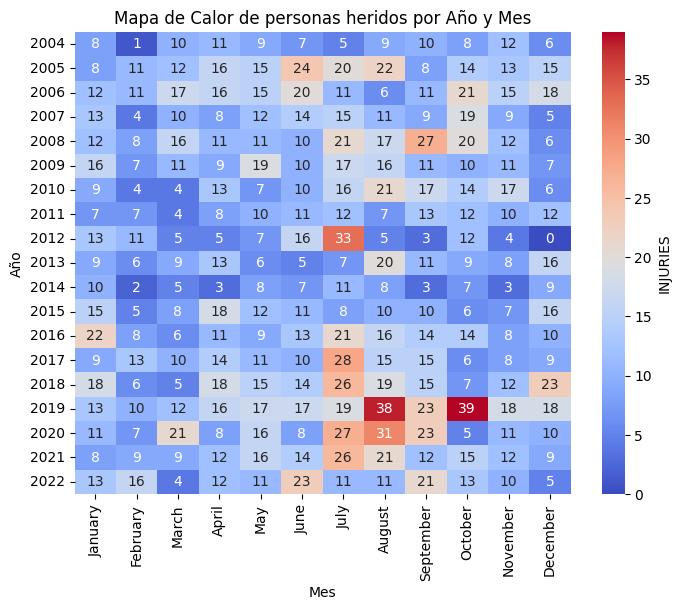

In [ ]:
# Grafico 5.
# Mapa de Calor de personas heridas por Año y Mes.
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Crear una tabla dinámica para los datos de INJURIES con el orden personalizado de los meses
pivot_heridos = df.pivot_table(index='YEAR', columns='MONTH', values='INJURIES', aggfunc='sum')
pivot_heridos = pivot_heridos[meses_ordenados]  # Aplicar el orden personalizado

#Crear el mapa de calor para INJURIES
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_heridos, annot=True, cmap="coolwarm", fmt='g', cbar_kws={'label': 'INJURIES'})
plt.title('Mapa de Calor de personas heridos por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

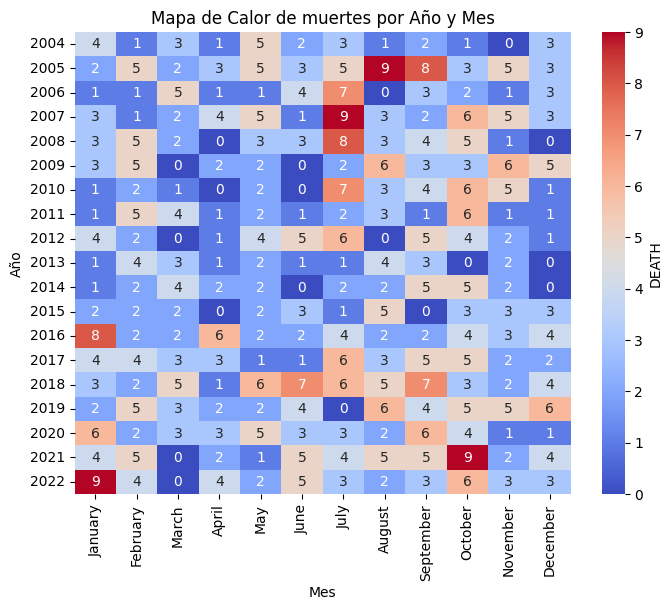

In [ ]:
# Grafico 6.
# Mapa de Calor de muertes por Año y Mes.

#Crear una tabla dinámica para los datos de DEATH con el orden personalizado de los meses
pivot_muertes = df.pivot_table(index='YEAR', columns='MONTH', values='DEATH', aggfunc='sum')
pivot_muertes = pivot_muertes[meses_ordenados]  # Aplicar el orden personalizado

#Crear el mapa de calor para DEATH
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_muertes, annot=True, cmap="coolwarm", fmt='g', cbar_kws={'label': 'DEATH'})
plt.title('Mapa de Calor de muertes por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()